# Problem Statement
Insurance premiums are often based on various factors that in the end decide the amount that will be covered from the insurance company.
As a data analyst/scientist you are given a set of historical data for an organizations customers and the respective charges that were levied upon the insurance company.

The data gives you the information about the users including their age, sex, bmi, hospitalization history, annual income, etc. Analyze and gather insights fron the data and create a linear regression model that will best predict the insurance charges for a new set of data.

**Step to follow**

Imp. the libr

imp.the data

EDA--->Null handling,outliers etc

feature eng.---Enconding,resclaing etc

feature selection

model building

model evalution

model deployment.

## Dataset Information
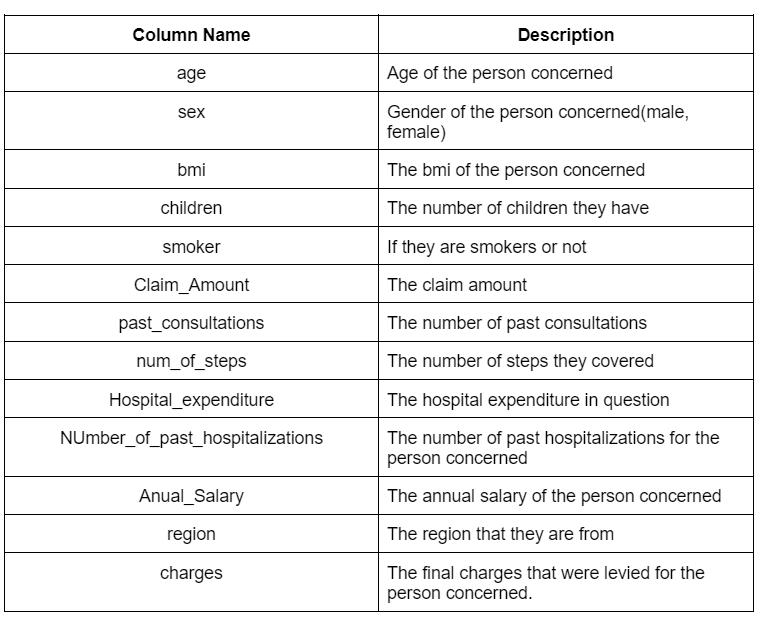

## Importing Initial Python Packages to build an approach towards the business Problem

In [1]:
import numpy as np  #mathematical computation
import pandas as pd  #data manipulation
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # data visualisation
import warnings # removing warning  
warnings.filterwarnings('ignore')  #raise or ignore

## Loading the dataset

In [2]:
insurance = pd.read_csv(r'D:\intellipaat ds ai ml\DS@AI\5 ml\04-13 linear regression handson/new_insurance_data (1) (1).csv')
# r stands for "raw" and will cause backslashes in the string to be interpreted as actual backslashes rather than special characters.

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [5]:
insurance.shape

(1338, 13)

In [6]:
insurance.ndim

2

In [7]:
insurance.info()   #data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [8]:
insurance.describe().round().T     #data descriptive infrence
# round()  --> round off decimals
# T --> Transpose columns-- row to column,vice versa

# 50% refers to median

,count,mean,std,min,25%,50%,75%,max
age,1329.0,39.0,14.0,18.0,27.0,39.0,51.0,6.400000e+01
bmi,1335.0,31.0,6.0,16.0,26.0,30.0,35.0,5.300000e+01
children,1333.0,1.0,1.0,0.0,0.0,1.0,2.0,5.000000e+00
Claim_Amount,1324.0,33361.0,15617.0,1920.0,20769.0,33700.0,45052.0,7.727800e+04
past_consultations,1332.0,15.0,7.0,1.0,9.0,15.0,20.0,4.000000e+01
num_of_steps,1335.0,910005.0,91886.0,695430.0,847200.0,914300.0,971684.0,1.107872e+06
Hospital_expenditure,1334.0,15841792.0,26693048.0,29453.0,4077633.0,7490337.0,10840822.0,2.616317e+08
NUmber_of_past_hospitalizations,1336.0,1.0,1.0,0.0,1.0,1.0,1.0,3.000000e+00
Anual_Salary,1332.0,369684860.0,566884292.0,2747072.0,77019323.0,141936093.0,324349867.0,4.117197e+09
charges,1338.0,13270.0,12110.0,1122.0,4740.0,9382.0,16640.0,6.377000e+04


In [9]:
insurance.describe(include='O')
# (include='O') -- >  "O" --object... provide details about categorical variables

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
insurance.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1329.0,NaN,NaN,NaN,39.310008,14.034818,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1335.0,NaN,NaN,NaN,30.665112,6.10169,15.96,26.3025,30.4,34.6875,53.13
children,1333.0,NaN,NaN,NaN,1.090773,1.201856,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claim_Amount,1324.0,NaN,NaN,NaN,33361.32718,15617.288337,1920.136268,20768.86039,33700.310675,45052.331957,77277.98848
past_consultations,1332.0,NaN,NaN,NaN,15.216216,7.467723,1.0,9.0,15.0,20.0,40.0
num_of_steps,1335.0,NaN,NaN,NaN,910004.69588,91886.119592,695430.0,847199.5,914300.0,971684.0,1107872.0
Hospital_expenditure,1334.0,NaN,NaN,NaN,15841791.944031,26693047.737619,29452.53296,4077633.13725,7490336.905,10840822.095,261631699.3
NUmber_of_past_hospitalizations,1336.0,NaN,NaN,NaN,1.060629,0.533583,0.0,1.0,1.0,1.0,3.0


In [ ]:
# if there are object datatypes in df, error will occur in calculating mean median,
# std, so exclude object dtype in new dtaframe and calculate

# insurance_mm = insurance.select_dtypes(exclude = ['object'])

In [11]:
insurance['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

## Checking the distribution of each of the variables in the dataset  


**note**: data distribution analysis helps in selecting mean (for normally distributed) or median (for skewed) for null value imputation.   
* For irregular distribution, Missing Value Imputation

    Use median for numerical features if distribution is irregular.

    For categorical-like or binned clusters, missing values could be imputed within the nearest cluster.
* Missing Value Treatment for uniform distribution:

    Since there’s no skew, mean or median can be used for imputation.

    For categorical uniform features, mode can be used.  

* Helps in analysing the pattern of data whether normally distributed or left or right skewed distribution

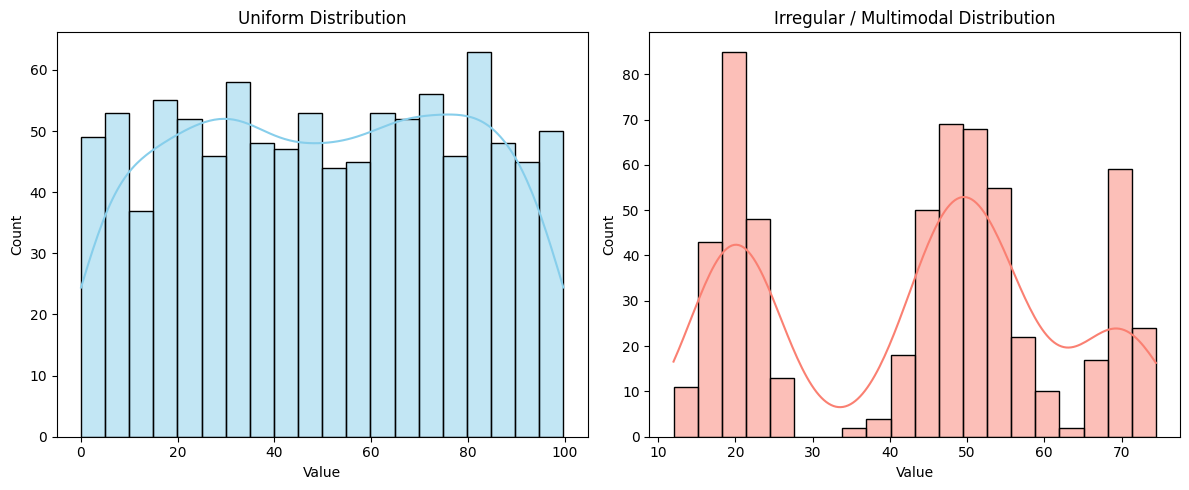

In [5]:
# ****Consider this block for undestanding distibution: not part of dataset

# 1. Uniform Distribution
uniform_data = np.random.uniform(low=0, high=100, size=1000)

# 2. Irregular Distribution (multimodal / patchy)

irregular_data = np.concatenate([
    np.random.normal(loc=20, scale=3, size=200),
    np.random.normal(loc=50, scale=5, size=300),
    np.random.normal(loc=70, scale=2, size=100)
])

# 3. Plot using distplot (Seaborn)
plt.figure(figsize=(12,5))
# Uniform
plt.subplot(1,2,1)
sns.histplot(uniform_data, bins=20, kde=True, color='skyblue')
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Count')

# Irregular
plt.subplot(1,2,2)
sns.histplot(irregular_data, bins=20, kde=True, color='salmon')
plt.title('Irregular / Multimodal Distribution')
plt.xlabel('Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**right-skewed/positive-skewed** distribution(most of the data concentrates on the **left**, and the tail stretches to the right)  
                * Mean > Median> Mode.  [2, 3, 3, 4, 4, 5, 6, 7, 50]  
**left-skewed / negative-skewed** distribution(most of the data concentrates on the **right**, and the tail stretches to the left)  
        * Mode > Median > Mean . [2, 40, 42, 45, 48, 50, 52, 55, 56]  
**normal distribution**, the mean = median = mode and located at the center of the curve.[8, 9, 9, 10, 10, 10, 11, 11, 12]  

*For skewed data, the ***MEDIAN*** is often a BETTER measure than the mean.

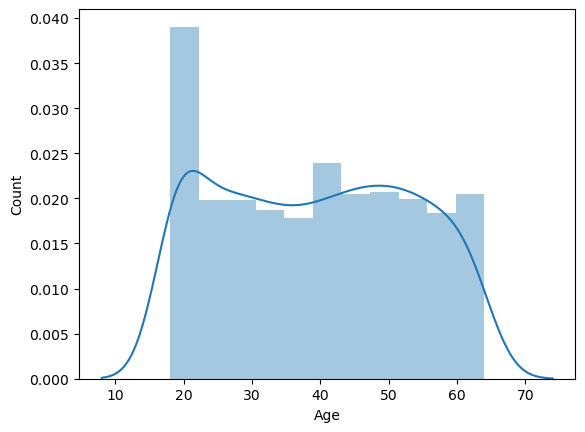

In [12]:
#distribution of age column
sns.distplot(x=insurance['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Interpretations From the plot
The distribution is not normally distributed, and peaks towards 20.


Skewness and Age Distribution  Example:  

Right-skewed (positively skewed): Tail extends to the right (toward higher ages).  
Most people are younger (clustered at lower ages), but there are a few older people that stretch the tail.  

Example: A dataset of ages in a school or a city with many children/young adults and few elderly.  

Left-skewed (negatively skewed): Tail extends to the left (toward lower ages).  
Most people are older (clustered at higher ages), but there are a few very young people that stretch the tail.  

Example: A dataset of ages in a retirement community or a senior population.

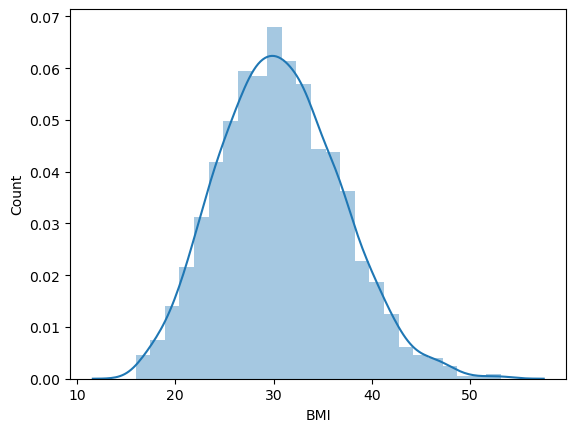

In [13]:
#distribution of bmi column
sns.distplot(x=insurance['bmi'])
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The distribution can be assumed as a normal distribution that peaks towards 30.

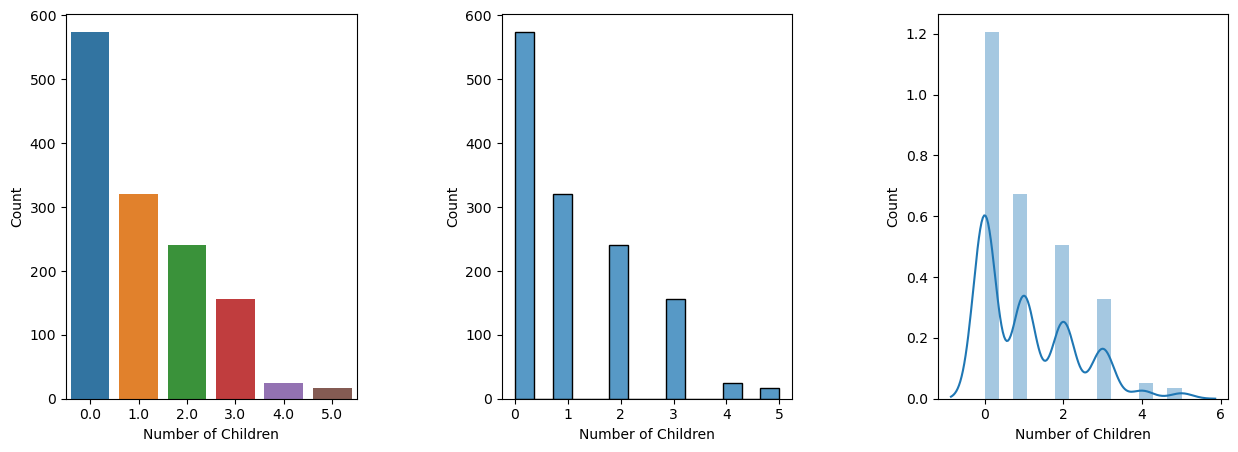

In [14]:
#distribution of children column
plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Interpretations from the plot
The distribution is not normally distributed, and we can deduce that most of the customers do not have child in the data.

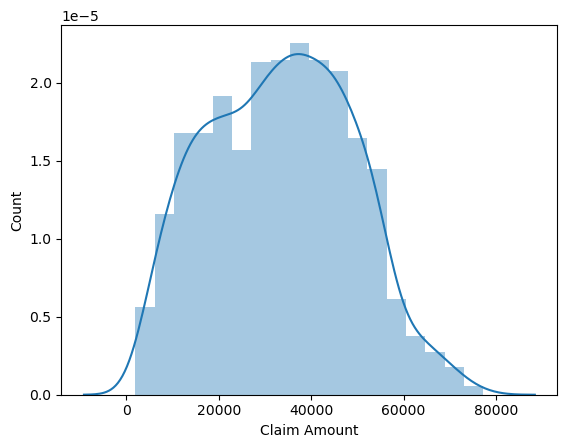

In [15]:
#distribution of claim amount
sns.distplot(x=insurance['Claim_Amount'])
plt.xlabel('Claim Amount')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The distribution is right skewed - majority of the claim amount falls unders the lower ranges of the entire data.

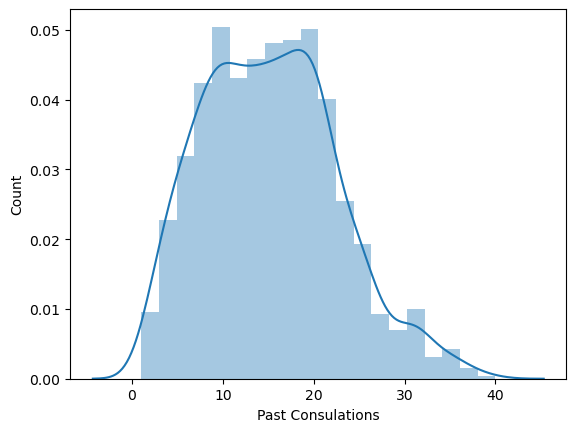

In [16]:
#distribution of past consultations
sns.distplot(x=insurance['past_consultations'])
plt.xlabel('Past Consulations')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The past consultations is right skewed, most of the consultations falls under 25.

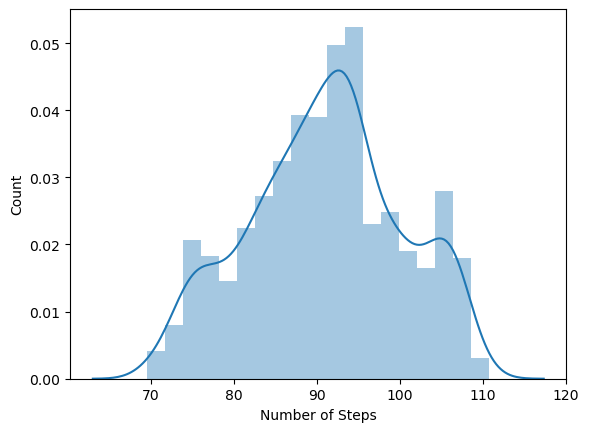

In [17]:
#distribution of number of steps column
inss = insurance.copy()   #to copy the data frame
inss['num_of_steps'] = inss['num_of_steps'].div(10000).round(2)
sns.distplot(x=inss['num_of_steps'])
plt.xlabel('Number of Steps')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The distribution can roughly be assumed as a normal distribution, but the plot is left skewed.

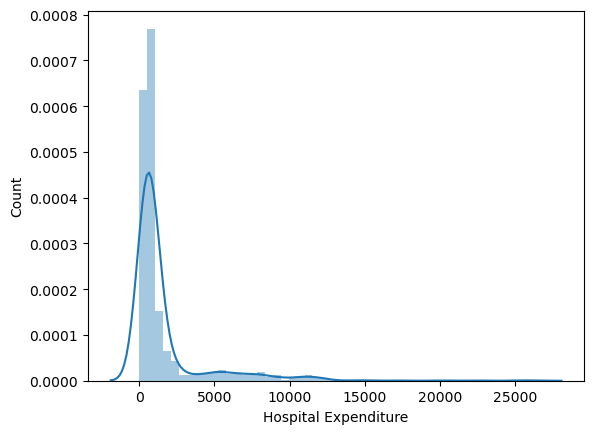

In [18]:
#distribution of hospital expenditure
inss['Hospital_expenditure'] = inss['Hospital_expenditure'].div(10000).round(2)
sns.distplot(x=inss['Hospital_expenditure'])
plt.xlabel('Hospital Expenditure')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
the distribution is right skewed for the hospital Expenditure

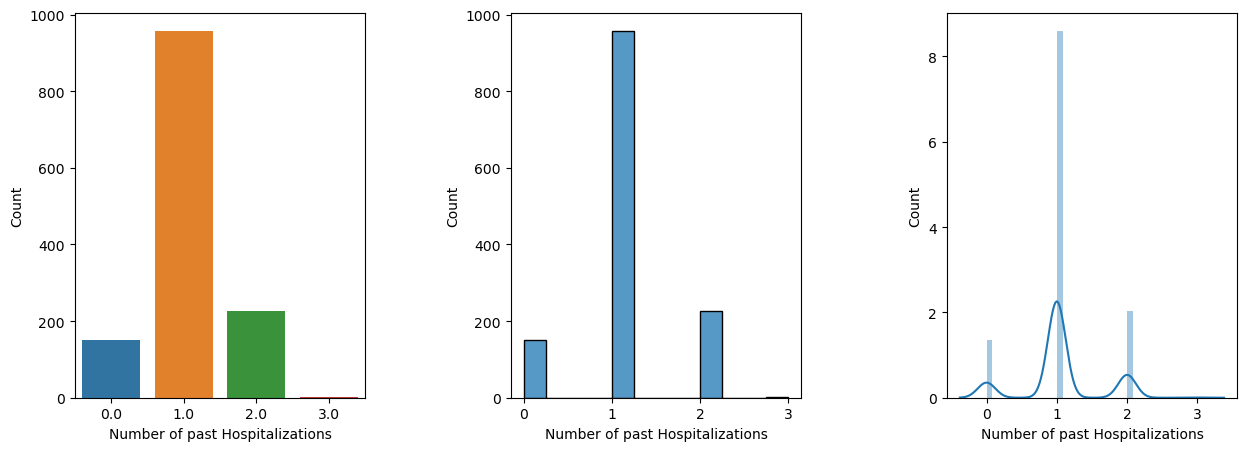

In [19]:
#distribution of number of past hospitalizations
plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('Number of past Hospitalizations')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('Number of past Hospitalizations')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('Number of past Hospitalizations')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [ ]:
# use loop for all columns in single code
# for cols in col:
#     sns.distplot(x = df4[cols])  # initially error occured because used df[col] instead of df[cols]  *****
#     plt.xlabel(cols) 
#     plt.show()


# #     plt.xlim(0,10)

# for cols in col:  
#     sns.histplot(data=df4, x=cols, kde=True)
#     plt.xlabel(cols)
#     plt.title(f'Distribution of {cols}')
#     plt.show()

# for cols in col:  
#     sns.countplot(x=df[cols])
#     plt.xlabel(cols)
#     plt.title(f'Distribution of {cols}')
#     plt.show()



### Interpretations from the plot
The plot shows the customers with 1.0 past hostpitalizations as the highest in the distribution followed by 2.0, 0.0, and 3.0 hospitalizations

In [20]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [21]:
#distribution of smokers column
from sklearn.preprocessing import LabelEncoder  #importing label enconding   ... L,E in uppercase
# check sklearn website for official documentation

# Check what is fit()---[prepare data], transform()---[use data], fit_transform()--prepare and use datas

le = LabelEncoder()

insurance['smoker'] = le.fit_transform(insurance['smoker'])
insurance['smoker'] = insurance['smoker'].astype(int)
# 0 and 1 decided based on alphabet order as per instructer

insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,0,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,0,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
# using loop:
# col_en = df.columns
# for col_n in col_en:
#     if df[col_n].dtypes == 'object':
#         df[col_n]= le.fit_transform(df[col_n])

# Or another method:
# df3=df.select_dtypes(exclude = 'float64')
# col3= df3.columns
# for cols3 in col3:
#     df[cols3]=le.fit_transform(df[cols3])
    
# for cols3 in col3:
#     sns.distplot(x=df[cols3])
#     plt.xlabel(cols3)
#     plt.show()

# you can first do encoding and plot distribution of all columns at once

In [22]:
insurance['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [23]:
# CHECK procedure for one hot and ordinal encoding ... rescaling procedure  Later

In [24]:
#distribution of the sex column

insurance['sex'] = le.fit_transform(insurance['sex'])
insurance['sex'] = insurance['sex'].astype(int)


In [25]:
insurance['sex'].value_counts()

sex
1    676
0    662
Name: count, dtype: int64

### Interpretations from the plot
The gender column shows the presence of males slighly higher than the female customers.

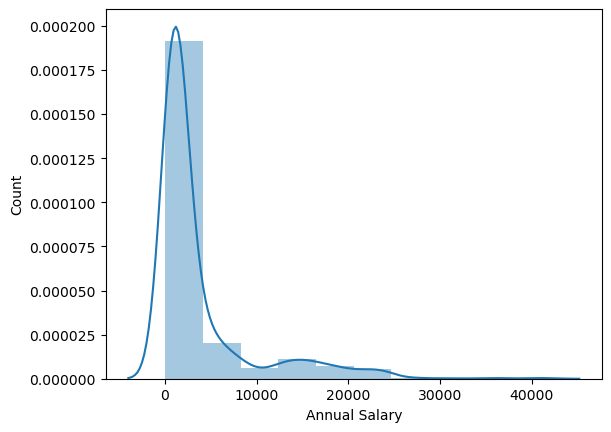

In [26]:
#distribution of annual salary
ins_dum = insurance.copy()
ins_dum['Anual_Salary'] = ins_dum['Anual_Salary'].div(100000).round(2)
sns.distplot(x=ins_dum['Anual_Salary'], bins=10)
plt.xlabel('Annual Salary')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The annual salary distribution is right skewed.

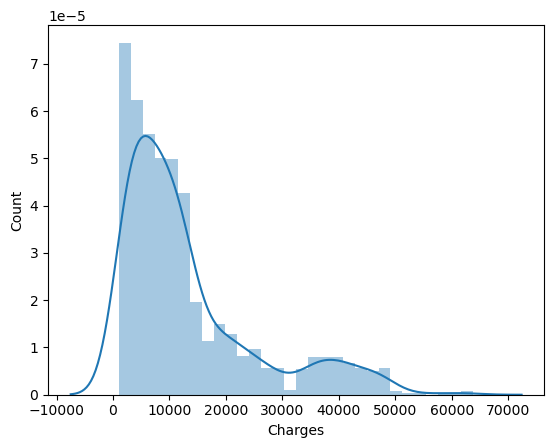

In [27]:
#distribution of charges column
sns.distplot(x=insurance['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The charges column is also right skewed.

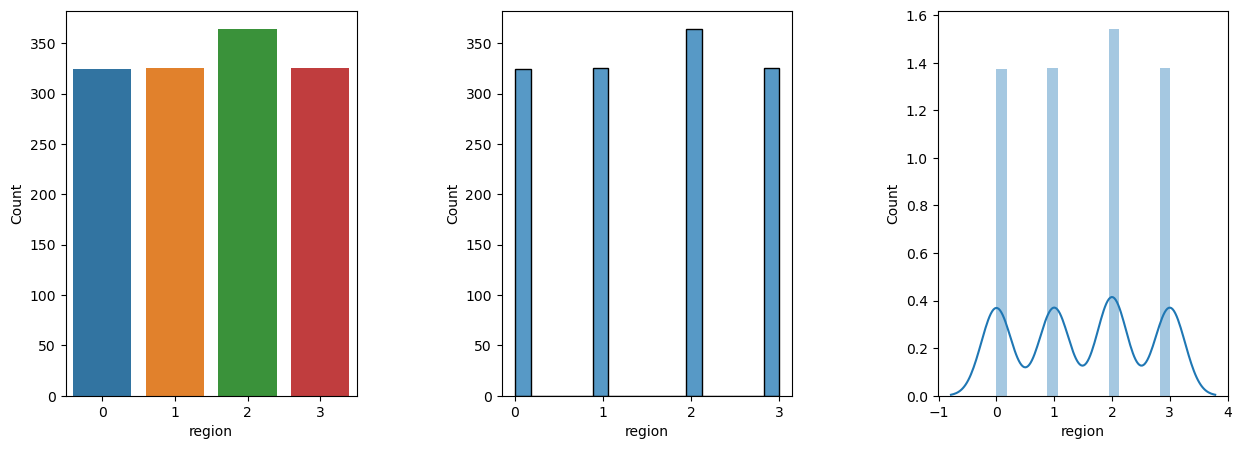

In [28]:
#distribution of reagions column
insurance['region'] = le.fit_transform(insurance['region'])
insurance['region'] = insurance['region'].astype(int)

plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Interpretations from the plot
The region column shows the data distributed equally in the entire population.

## Measure of Peakedness and Outlier Analysis using Boxplots

In [ ]:
# for cols in col:  
#     sns.boxplot(df4[cols])
# #     sns.boxplot(y=df4[cols])... for value in y column
# #     sns.boxplot(x=df4[cols])... for value in x column
#     plt.xlabel(cols)
#     plt.title(f'Distribution of {cols}')
#     plt.show()

<Axes: >

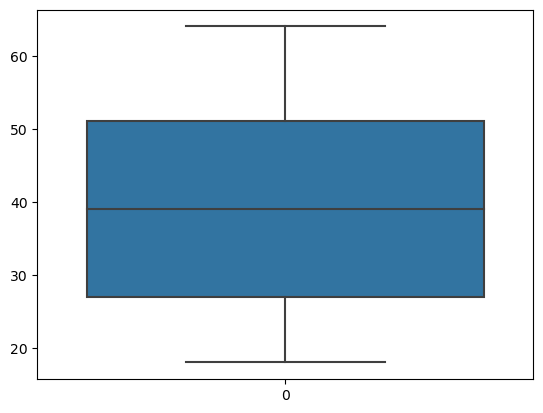

In [29]:
sns.boxplot(insurance['age'])

In [30]:
insurance.describe()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
count,1329.000000,1338.000000,1335.000000,1333.000000,1338.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000,1338.000000
mean,39.310008,0.505232,30.665112,1.090773,0.204783,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,1.515695,13270.422265
std,14.034818,0.500160,6.101690,1.201856,0.403694,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,0.000000,1121.873900
25%,27.000000,0.000000,26.302500,0.000000,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,2.000000,9382.033000
75%,51.000000,1.000000,34.687500,2.000000,0.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,3.000000,63770.428010


In [31]:
IQR=34.687500-26.302500
IQR

8.385000000000002

In [32]:
8.385000000000002*1.5  

12.577500000000002

In [33]:
#lower fence LF=Q1-1.5(IQR)
#IQR=Q3-Q1
#upper fence UF=Q3+1.5(IQR)

In [34]:
LF=26.302500-12.577500000000002
LF

13.724999999999996

In [35]:
34.687500+12.577500000000002

47.265

<Axes: xlabel='bmi'>

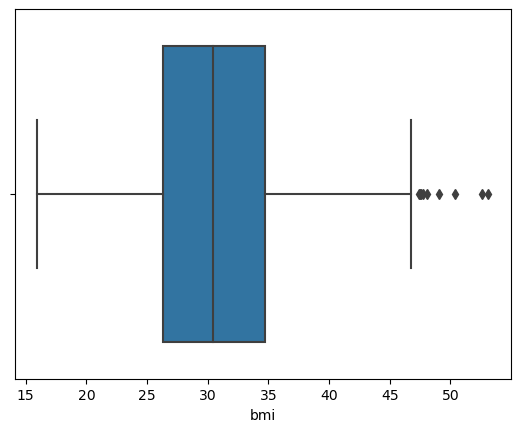

In [36]:
sns.boxplot(x=insurance['bmi'])

<Axes: xlabel='children'>

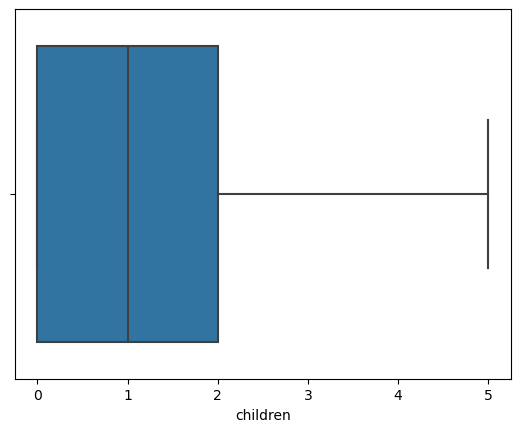

In [37]:
sns.boxplot(x=insurance['children'])

<Axes: xlabel='Claim_Amount'>

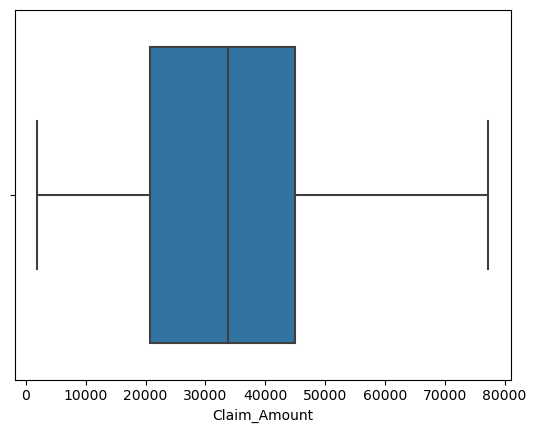

In [38]:
sns.boxplot(x=insurance['Claim_Amount'])

<Axes: xlabel='past_consultations'>

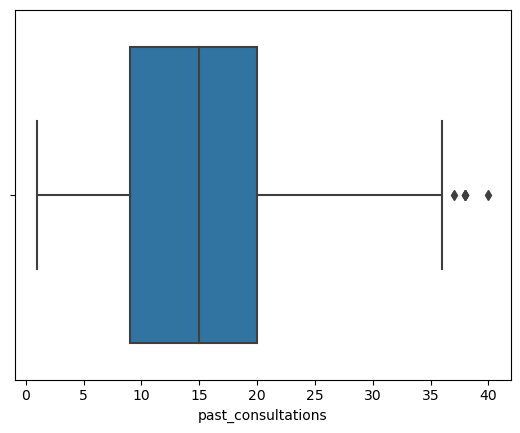

In [39]:
sns.boxplot(x=insurance['past_consultations'])

<Axes: xlabel='num_of_steps'>

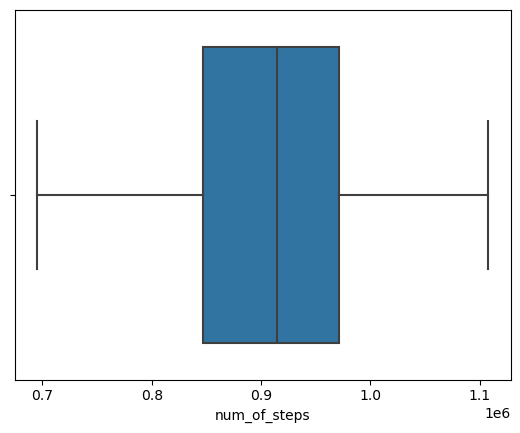

In [40]:
sns.boxplot(x=insurance['num_of_steps'])

<Axes: xlabel='Hospital_expenditure'>

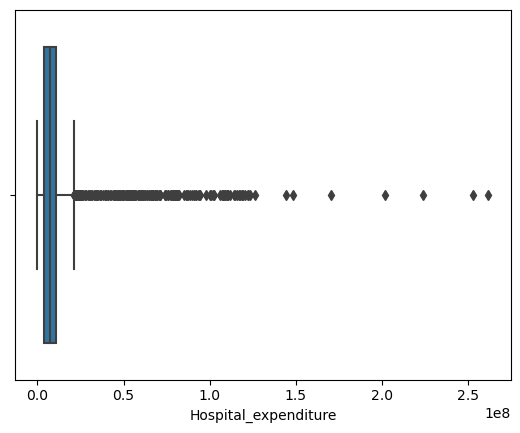

In [41]:
sns.boxplot(x=insurance['Hospital_expenditure'])

<Axes: xlabel='Anual_Salary'>

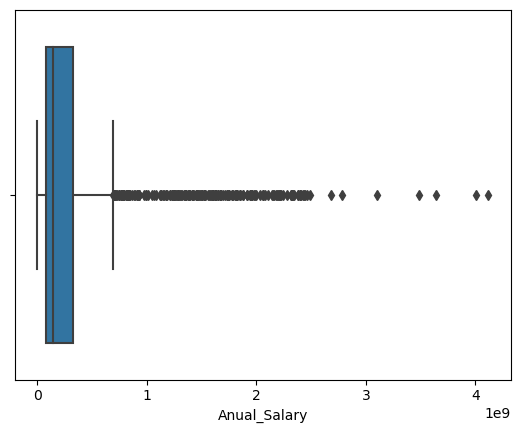

In [42]:
sns.boxplot(x=insurance['Anual_Salary'])

<Axes: xlabel='region'>

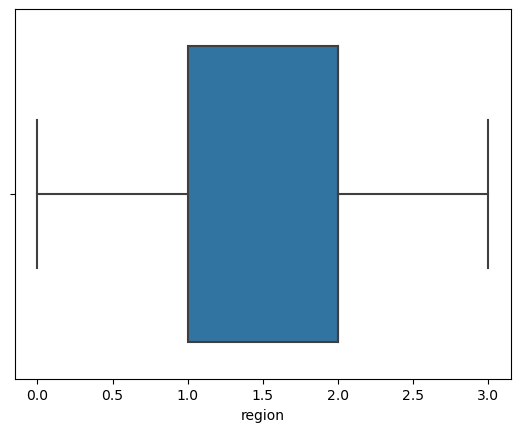

In [43]:
sns.boxplot(x=insurance['region'])

### Interpretations from the plot

<Axes: xlabel='charges'>

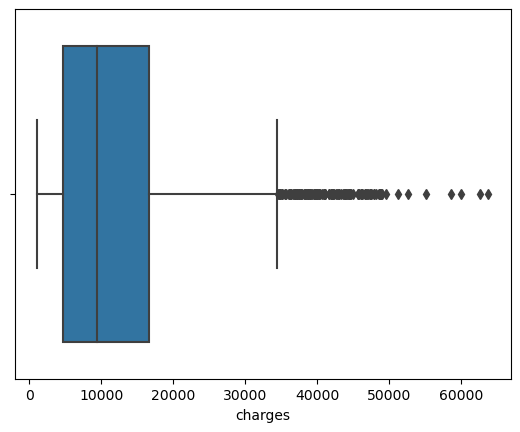

In [44]:
sns.boxplot(x=insurance['charges'])

### Interpretations from the plots
There is a presence of outliers in the columns 'charges', 'annual_salary', 'hospital_expenditure', 'past_consultations', 'bmi', etc.
1. We will not treat the outliers, since the target variable also consists of outliers which is driven from the other independent variables.

## Understanding the relationship between the dependent and independent variables using a pairplot

<Figure size 1000x500 with 0 Axes>

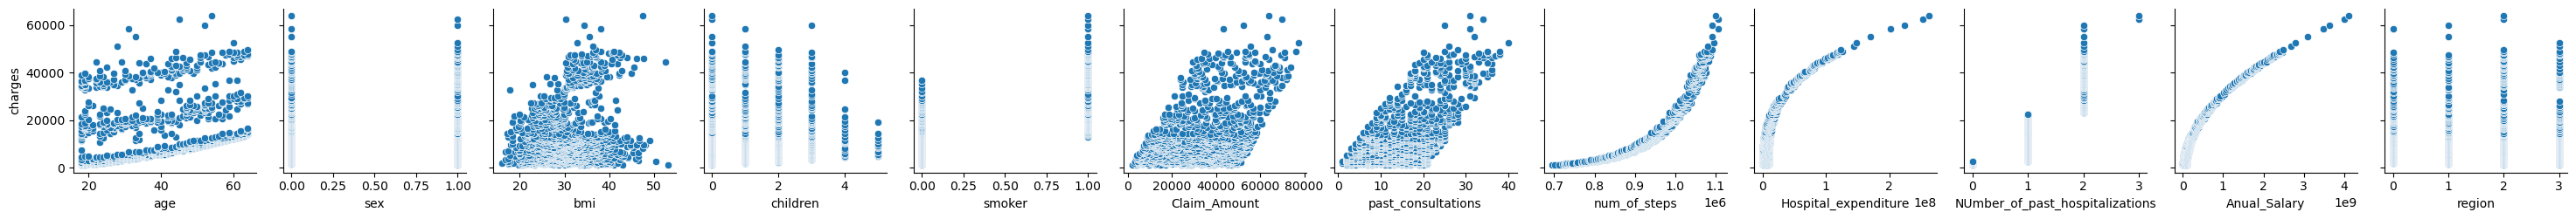

In [45]:
plt.figure(figsize=(10,5))
sns.pairplot(data=insurance, y_vars=['charges'], x_vars=['age',
                                                         'sex',
                                                         'bmi',
                                                         'children',
                                                         'smoker',
                                                         'Claim_Amount',
                                                         'past_consultations',
                                                         'num_of_steps',
                                                         'Hospital_expenditure',
                                                         'NUmber_of_past_hospitalizations',
                                                         'Anual_Salary',
                                                         'region'])

### Interpretations from the scatter plots
1. Several of the features shows a positive linear relationship with the target variable. These features will be further analyzed w.r.t the correlation to reach a conclusion for their usability in the linear regression model.

## Data Imputation

In [46]:
insurance.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

### Approach for data imputation in the insurance data.
1. We have replaced the null values with the mean in columns where it showed close to a normal distribution i.e age, bmi, claim_amount, past_consultations, num_of_steps.
2. For the distributions that showed a skewed distribution, we have replaced the null values with the median of the column.

In [47]:
# fillna-->replaces null values
# median is calculated by arranging values in ascending order
insurance['age'] = insurance['age'].fillna(insurance['age'].median())
insurance['bmi'] = insurance['bmi'].fillna(insurance['bmi'].mean())
insurance['children'] = insurance['children'].fillna(insurance['children'].median())
insurance['Claim_Amount'] = insurance['Claim_Amount'].fillna(insurance['Claim_Amount'].mean())
insurance['past_consultations'] = insurance['past_consultations'].fillna(insurance['past_consultations'].mean())
insurance['num_of_steps'] = insurance['num_of_steps'].fillna(insurance['num_of_steps'].mean())
insurance['Hospital_expenditure'] = insurance['Hospital_expenditure'].fillna(insurance['Hospital_expenditure'].median())
insurance['NUmber_of_past_hospitalizations'] = insurance['NUmber_of_past_hospitalizations'].fillna(insurance['NUmber_of_past_hospitalizations'].median())
insurance['Anual_Salary'] = insurance['Anual_Salary'].fillna(insurance['Anual_Salary'].median())

In [48]:
insurance.isna().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

## Feature Selection for Data Modeling

In [49]:
correlation = insurance.corr()
correlation

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
age,1.000000,-0.019154,0.112165,0.041710,-0.028792,0.122820,0.168408,0.513197,0.137208,0.359637,0.163478,0.004623,0.293735
sex,-0.019154,1.000000,0.045170,0.018533,0.076185,-0.003884,0.050403,0.010342,0.069940,0.000214,0.072702,0.004588,0.057292
bmi,0.112165,0.045170,1.000000,0.007755,0.003610,0.093313,0.130667,0.135903,0.256892,0.137043,0.241505,0.158261,0.198691
children,0.041710,0.018533,0.007755,1.000000,0.009608,0.041502,0.054832,0.163487,0.025315,0.185546,0.041260,0.015011,0.070877
smoker,-0.028792,0.076185,0.003610,0.009608,1.000000,0.334406,0.502836,0.665711,0.662698,0.588682,0.739676,-0.002181,0.787251
Claim_Amount,0.122820,-0.003884,0.093313,0.041502,0.334406,1.000000,0.271482,0.398342,0.369921,0.379889,0.403974,0.009028,0.435635
past_consultations,0.168408,0.050403,0.130667,0.054832,0.502836,0.271482,1.000000,0.559682,0.542172,0.500131,0.589304,-0.001866,0.627592
num_of_steps,0.513197,0.010342,0.135903,0.163487,0.665711,0.398342,0.559682,1.000000,0.624835,0.845128,0.733685,-0.041920,0.889848
Hospital_expenditure,0.137208,0.069940,0.256892,0.025315,0.662698,0.369921,0.542172,0.624835,1.000000,0.651827,0.957189,0.029446,0.871796
NUmber_of_past_hospitalizations,0.359637,0.000214,0.137043,0.185546,0.588682,0.379889,0.500131,0.845128,0.651827,1.000000,0.735802,-0.031450,0.820682


### Inferences
There is a strong to moderate correlation with the charges column with the following columns:
1. smoker
2. Claim_Amount
3. past_consultations
4. num_of_steps
5. Hospital_expenditure
6. NUmber_of_past_hospitalizations
7. Anual_Salary

The column 'age', 'sex', 'region', 'children', 'sex' shows no considerable correlation with the charges column, so we will not be considering these features for the initial model.


<Axes: >

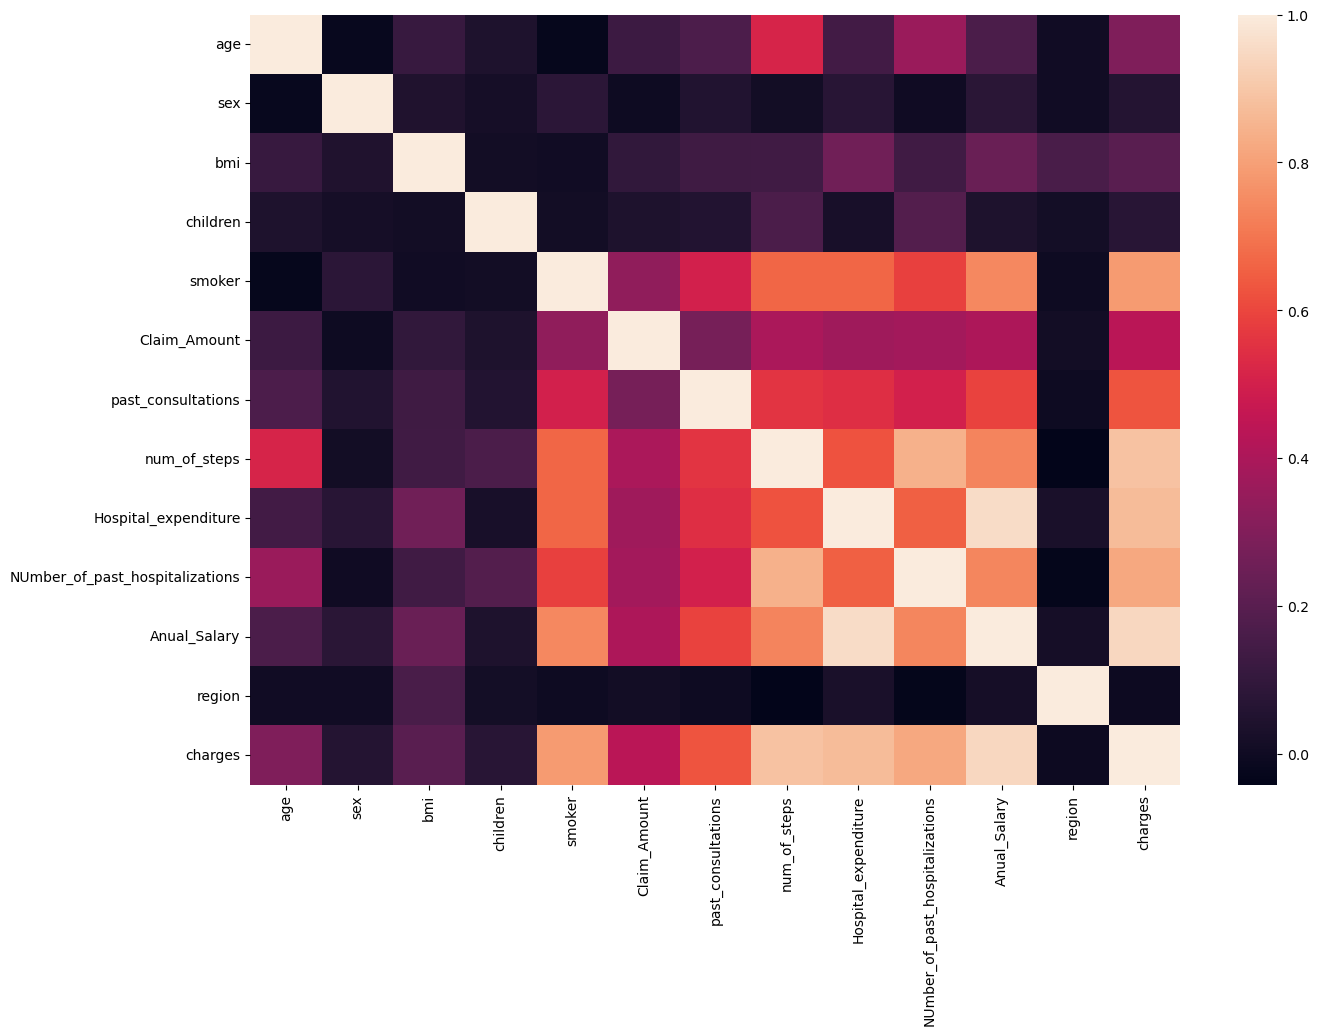

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation)

### The correlation heatmap shows the columns that will be most useful for the modeling. The sex, children, and region column shows no considerable correlation.

## Data Preprocessing Before Model Training

In [51]:
a,b,c,d=1,2,3,4    # its is just an example for assigning in same line

In [52]:
from sklearn.model_selection import train_test_split
#splitting the data for model 1
X = insurance.drop(['charges', 'age', 'sex', 'bmi', 'children', 'region'], axis=1)
y = insurance['charges']  # or y = insurance.iloc[:,-1]  



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)


# x .. pick only highly correlated values and drop other column
# y..target variable
# Divide the data in to 2 parts train and test in the ratio 75%:25% preferrably, we can choose any ratio

# # random_state --> to split any random percent among the data. eg if data =[1 to 10] and split 80%(train): 20%(test)
# if random_state = 0, every time same split will occur whever executed the code
# combinations 1,2,3,4,5,6,7,8 and 9,10
#              1,2,3,4,5,6,9,10and ,7,8 
#              1,2,3,5,6,7,9,10and 4,8  ..so on


In [53]:
y_train

216      3309.79260
731     10355.64100
866     12333.82800
202      3176.28770
820     11674.13000
           ...     
715     10085.84600
905     13041.92100
1096    21880.82000
235      3558.62025
1061    19749.38338
Name: charges, Length: 1070, dtype: float64

In [54]:
X_train

,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
216,0,13041.90483,4.0,815477.0,1.273883e+06,1.0,3.933610e+07
731,0,15301.88507,17.0,916445.0,3.355828e+06,1.0,1.250280e+08
866,0,22670.05311,20.0,947996.0,6.133821e+06,1.0,1.670188e+08
202,0,22630.60525,9.0,820196.0,5.490229e+06,1.0,1.642620e+07
820,0,38655.63504,19.0,928213.0,4.734405e+06,1.0,2.259281e+08
...,...,...,...,...,...,...,...
715,0,27731.37254,8.0,920050.0,2.785092e+06,1.0,1.312519e+08
905,0,33885.79768,21.0,945757.0,7.966184e+06,1.0,2.516949e+08
1096,1,35000.50338,15.0,1005596.0,1.899002e+07,1.0,4.946560e+08
235,0,18767.94647,15.0,815981.0,2.247799e+06,1.0,2.946028e+07


In [55]:
X_test

,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
559,0,33330.50185,21.0,885629.0,6.868865e+06,1.0,7.559974e+07
1087,0,51309.90642,28.0,999088.0,1.394561e+07,1.0,5.047760e+08
1020,1,38360.96691,16.0,973272.0,1.301319e+07,1.0,3.930467e+08
460,0,51373.64190,12.0,863605.0,1.000634e+07,1.0,5.488337e+07
802,0,12992.13995,24.0,933863.0,4.075903e+06,1.0,2.061268e+08
...,...,...,...,...,...,...,...
682,0,27425.19835,5.0,908350.0,1.870300e+06,1.0,1.058095e+08
629,0,20322.78532,14.0,899405.0,8.414212e+05,1.0,1.451129e+08
893,0,56840.23864,24.0,943649.0,8.228465e+06,1.0,1.749679e+08
807,0,38473.01782,21.0,919690.0,2.087158e+06,1.0,1.449292e+08


### Standardizing the features
Normalizing the features so that the samples will have the same mean and standard deviation.

rescaling:
1. normalization   (min max (0,1) scaling).. where outliers are  not present
2. standardisation (z score) .. use when outliers are present

In [56]:
#feature scaling using the standardscalar
from sklearn.preprocessing import StandardScaler
#scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)




In [57]:
y_train_arr = y_train.values   #.values needed****
y_train = y_train_arr.reshape((-1,1))   # note : 2 (()) needed and another method can convert y to data frame before train_test_split

In [58]:
y_train = sc.fit_transform(y_train)


## Model Building

In [59]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)



LinearRegression()

### Making predictions
1. We are making predictions on the test set of each of the 3 models.

In [60]:
predictions = model.predict(X_test)  # this is rescaled result of standardisation
predictions = sc.inverse_transform(predictions) # removing standardisation for real values of predictions


In [61]:
predictions

array([[ 8.16183475e+03],
       [ 1.96578112e+04],
       [ 1.92108663e+04],
       [ 6.66748909e+03],
       [ 1.20733826e+04],
       [ 5.28334697e+03],
       [ 8.61289014e+03],
       [ 8.27049235e+03],
       [ 1.14140677e+04],
       [ 1.06406760e+04],
       [-9.59985047e+01],
       [ 8.26930369e+03],
       [ 2.59194459e+04],
       [ 1.22943682e+04],
       [ 4.21420833e+03],
       [ 5.44901346e+03],
       [-2.11255231e+03],
       [ 1.14395180e+04],
       [ 8.06025236e+03],
       [ 1.29717182e+04],
       [ 4.95188831e+03],
       [ 1.07339860e+04],
       [ 2.66535256e+02],
       [ 5.02059121e+03],
       [ 7.38692205e+03],
       [ 1.05835643e+04],
       [-5.21348391e+01],
       [ 4.12344780e+04],
       [ 1.08671452e+04],
       [ 1.30700618e+03],
       [ 1.36630030e+04],
       [ 1.13257579e+04],
       [ 4.77606015e+03],
       [ 4.81810571e+03],
       [ 2.26178701e+04],
       [ 9.79579155e+03],
       [ 2.07634217e+02],
       [ 8.61950660e+03],
       [ 5.8

## Model Evaluation

1. We are calculating the r2 score and adjusted r2 score for each of the models.


In [62]:
from sklearn.metrics import r2_score
from sklearn.metrics import *

r2_score(y_test, predictions)

# r2score check difference between actual and predicted values


0.9853456464454016